<a href="https://colab.research.google.com/github/youryharchenko/goit-algo-fp/blob/main/%D0%A4%D0%9F_%D0%AE%D1%80%D1%96%D0%B9_%D0%A5%D0%B0%D1%80%D1%87%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Фiнальний проєкт

## Завдання 1. Структури даних. Сортування. Робота з однозв'язним списком

### Реалізація однозв'язного списку

In [253]:
class LList():

    def __init__(self, value=None):
        match value:
            case None | []:
                self.pair = None
                self.len = 0
            case tuple((_, _)):
                self.pair = value
                self.len = 1
            case list([*items]):
                self.pair = self.make_llist(items)
                self.len = len(items)
            case _:
                raise ValueError("value must be list or None" )

    def make_llist(self, items):
        l = len(items)
        if l > 0:
            current = None
            for i in range(l, 0, -1):
                next = (items[i-1], current)
                current = next
            return current
        else:
            return None

    def cons(self, item):
        self.pair = (item, self.pair)
        self.len += 1
        return self

    def first(self):
        if self.pair is not None:
            return self.pair[0]
        else:
            return None

    def pop(self):
        if self.pair is not None:
            value = self.pair[0]
            self.pair = self.pair[1]
            self.len -= 1
            return value
        else:
            return None

    def tail(self):
        if self.pair:
            return LList(self.pair[1])
        else:
            return LList()

    def to_plist(self):
        plist = []
        current = self.pair
        while current is not None:
            plist.append(current[0])
            current = current[1]
        return plist

    # Цей метод створює новий список із зворотнім порядком елементів
    def reverse_new(self):
        result = LList()
        current = self.pair
        while current is not None:
            result.cons(current[0])
            current = current[1]
        return result

    # Цей метод робить зворотній порядок елементів по місцю, змінюючи посилання між вузлами
    def reverse_inplace(self):
        current = self.pair
        prior = None
        while current is not None:
            prior = (current[0], prior)
            current = current[1]
        self.pair = prior


    # Цей метод повертає новий відсортований список
    def insertion_sort(self):
        sorted, unsorted = LList(), LList(self.to_plist())

        while unsorted.len > 0:
            rev = LList()

            key = unsorted.pop()
            current = sorted.pair
            while current is not None:
                if key is not None and key < current[0]:
                    break
                else:
                    rev.cons(current[0])
                current = current[1]

            next = (key, current)
            rev_current = rev.pair
            while rev_current is not None:
                next = (rev_current[0], next)
                rev_current = rev_current[1]

            sorted.pair = next
            sorted.len += 1

        return sorted

    # Цей метод зливає два відсоротованих списки в новий відсортований список
    def merge(self, llist):
        left = LList(self.to_plist())
        right = LList(llist.to_plist())
        merged = LList()


        while left.len > 0 and right.len > 0 :
            left_first = left.first()
            right_first =  right.first()
            if left_first is not None and right_first is not None:
                if left_first <= right_first:
                    merged.cons(left.pop())
                else:
                    merged.cons(right.pop())

        while left.len > 0:
            merged.cons(left.pop())

        while right.len > 0:
            merged.cons(right.pop())

        merged.reverse_inplace()
        return merged


    def __repr__(self):
        return f"{self.pair}"

### Реверс однозв'язного списку

Реверс однозв'язного списку створюючи новий

In [254]:
linked_list = LList([i for i in range(11)])
linked_list.to_plist()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [255]:
linked_list.reverse_new().to_plist()

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

Реверс однозв'язного списку по місцю, міняючи напрям посилань

In [256]:
linked_list.reverse_inplace()
linked_list.to_plist()

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

### Сортування однозв'язного списку методом вставки

Створюється новий список

In [257]:
import random
linked_list = LList(random.sample(range(11), 11))
linked_list.to_plist()

[1, 0, 9, 10, 5, 3, 8, 4, 7, 2, 6]

In [258]:
linked_list.insertion_sort().to_plist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### Об'єднання двох відсортованих однозв'язних списка в один відсортований список

In [259]:
left_list = LList(random.sample(range(11), 11))
right_list = LList(random.sample(range(11), 11))

In [260]:
left_list.to_plist()

[8, 5, 6, 3, 10, 7, 9, 2, 4, 0, 1]

In [261]:
right_list.to_plist()

[10, 3, 9, 7, 4, 1, 8, 5, 2, 0, 6]

In [262]:
left_list.insertion_sort().merge(right_list.insertion_sort()).to_plist()

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10]

## Завдання 2. Рекурсія. Створення фрактала “дерево Піфагора” за допомогою рекурсії

In [263]:
!pip install ColabTurtle

До малювання додано трохи випадковості

In [264]:
from ColabTurtle.Turtle import *

def tree(branchLen, deep=6):
    if deep == 0:
        return

    save_color = pencolor()
    save_size = pensize()

    color((0, int((0.15+(0.75**deep))*255), 0))
    pensize(int(10*deep*0.75))

    forward(branchLen)
    right(20)

    k = random.gauss(0, branchLen/4)

    tree(int(branchLen * 0.75 + k), deep-1)

    left(40)

    tree(int(branchLen*0.75 + k), deep-1)

    right(20)
    backward(branchLen)

    color(save_color)
    pensize(save_size)


In [265]:
# Глибина рекурсії N
N = 6

initializeTurtle()

speed(12)

color((0, int(0.15*255), 0))
pensize(10)

#left(90)
up()
backward(100)
down()

tree(100, N)

## Завдання 3. Дерева, алгоритм Дейкстри

### Реалізація алгоритма Дейкстри

In [266]:
import heapq

def dijkstra(graph, start_node):
    distances = {node: float('inf') for node in graph}
    distances[start_node] = 0
    priority_queue = [(0, start_node)] # (distance, node)

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor in graph[current_node].items():
            weight = neighbor[1]['weight']
            new_distance = current_distance + weight
            if new_distance < distances[neighbor[0]]:
                distances[neighbor[0]] = new_distance
                heapq.heappush(priority_queue, (new_distance, neighbor[0]))

    return distances

### Граф для роботи

In [267]:
graph = {
    'A': {'B': {'weight': 1}, 'C': {'weight': 4}, 'F': {'weight': 7}},
    'B': {'A': {'weight': 1}, 'D': {'weight': 2}, 'E': {'weight': 5}},
    'C': {'A': {'weight': 4}, 'F': {'weight': 3}},
    'D': {'B': {'weight': 2}, 'E': {'weight': 1}},
    'E': {'B': {'weight': 5}, 'D': {'weight': 1}, 'F': {'weight': 2}},
    'F': {'A': {'weight': 7}, 'C': {'weight': 3}, 'E': {'weight': 2}}
}



In [268]:
import networkx as nx
import matplotlib.pyplot as plt

In [269]:
G = nx.Graph(graph)

In [270]:
nx.get_edge_attributes(G, 'weight')

{('A', 'B'): 1,
 ('A', 'C'): 4,
 ('A', 'F'): 7,
 ('B', 'D'): 2,
 ('B', 'E'): 5,
 ('C', 'F'): 3,
 ('D', 'E'): 1,
 ('E', 'F'): 2}

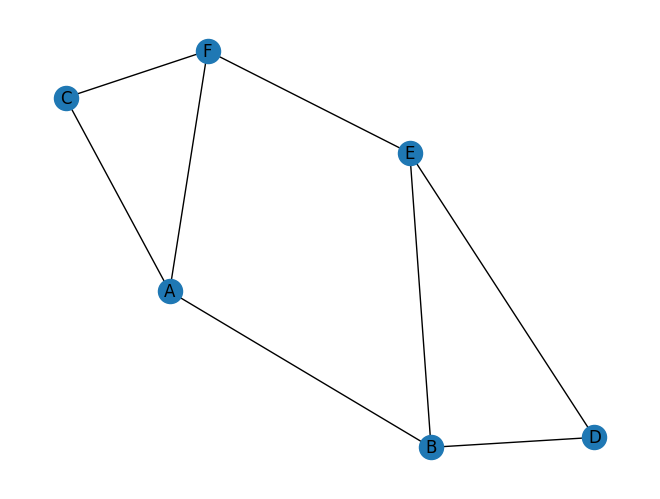

In [271]:
pos = nx.planar_layout(G)

nx.draw(G, with_labels=True)
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

### Пошук найкоротших шляхів

Наш варіант функції

In [272]:
start_node = 'A'
shortest_paths = dijkstra(graph, start_node)
shortest_paths

{'A': 0, 'B': 1, 'C': 4, 'D': 3, 'E': 4, 'F': 6}

Порівняємо з бібліотечним

In [273]:
list(nx.all_pairs_dijkstra_path_length(G))[0]

('A', {'A': 0, 'B': 1, 'D': 3, 'C': 4, 'E': 4, 'F': 6})

In [274]:
nx.dijkstra_path(G, 'A', 'E')

['A', 'B', 'D', 'E']

## Завдання 4. Візуалізація піраміди

### Розбір коду візуалізації дерева

In [275]:
import uuid

In [276]:
class Node:
  def __init__(self, key, color="skyblue"):
    self.left = None
    self.right = None
    self.val = key
    self.color = color
    self.id = str(uuid.uuid4())

  def __repr__(self):
    return f"Node(id={self.id}, val={self.val}, color={self.color})"

In [277]:
def add_edges(graph, node, pos, x=0, y=0, layer=1):
  if node is not None:
    graph.add_node(node.id, color=node.color, label=node.val)
    if node.left:
      graph.add_edge(node.id, node.left.id)
      l = x - 1 / 2 ** layer
      pos[node.left.id] = (l, y - 1)
      l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
    if node.right:
      graph.add_edge(node.id, node.right.id)
      r = x + 1 / 2 ** layer
      pos[node.right.id] = (r, y - 1)
      r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)

  return graph

In [278]:
def draw_tree(tree_root):
  tree = nx.DiGraph()
  pos = {tree_root.id: (0, 0)}
  tree = add_edges(tree, tree_root, pos)

  colors = [node[1]['color'] for node in tree.nodes(data=True)]
  labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}

  plt.figure(figsize=(8, 5))
  nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
  plt.show()

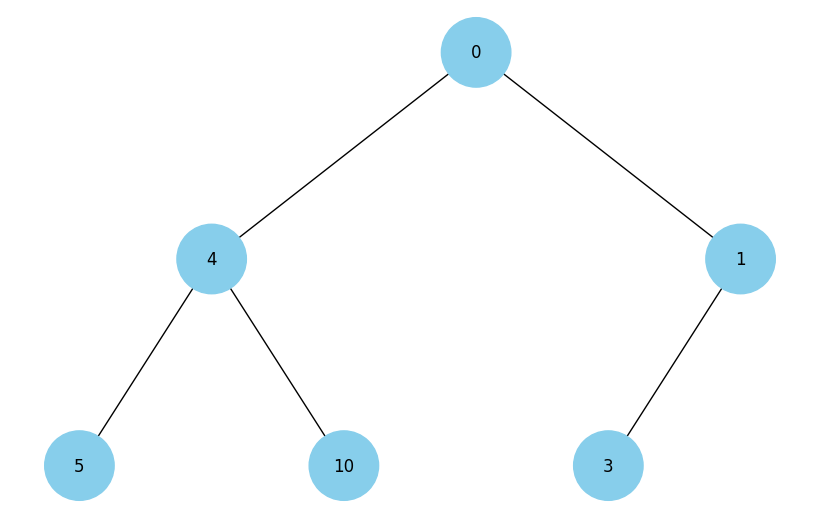

In [279]:
# Створення дерева
root = Node(0)
root.left = Node(4)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(3)

# Відображення дерева
draw_tree(root)

### Візуалізація купи як дерева

In [280]:
import queue

def visualize_heap(heap):
  #print(heap)
  heapq.heapify(heap)
  #print(heap)
  q = queue.Queue()

  if len(heap):
    root = Node(heapq.heappop(heap))
    q.put(root)
  else:
    raise ValueError("List is empty")

  while not q.empty():
    current = q.get()
    if len(heap):
      current.left = Node(heapq.heappop(heap))
      q.put(current.left)
    if len(heap):
      current.right = Node(heapq.heappop(heap))
      q.put(current.right)

  return root


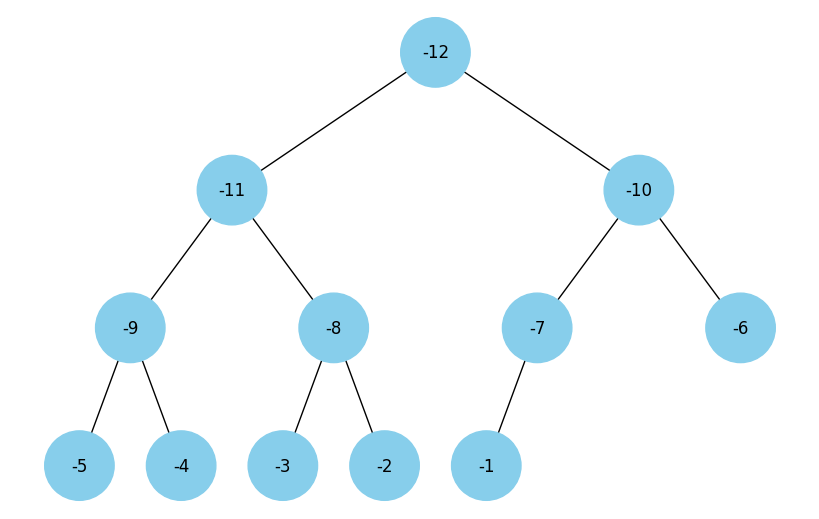

In [281]:
root_heap = visualize_heap(random.sample(range(-12, 0), 12))
draw_tree(root_heap)



## Завдання 5. Візуалізація обходу бінарного дерева

### Створення дерева

In [282]:
def make_tree(lst):
  q = queue.Queue()
  color = "#0000FF"

  if len(lst):
    root = Node(lst.pop(), color=color)
    q.put(root)
  else:
    raise ValueError("List is empty")

  while not q.empty():
    current = q.get()
    if len(lst):
      current.left = Node(lst.pop(), color=color)
      q.put(current.left)
    if len(lst):
      current.right = Node(lst.pop(), color=color)
      q.put(current.right)

  return root



### Обхід дерева в глибину

In [292]:
def deep_walk(root):
  r = 0
  g = 0

  st = []
  st.append(root)
  while len(st):
    current = st.pop()
    current.color = f"#{r:02x}{g:02x}FF"

    if current.right is not None:
      st.append(current.right)

    if current.left is not None:
      st.append(current.left)

    r += 20
    g += 20



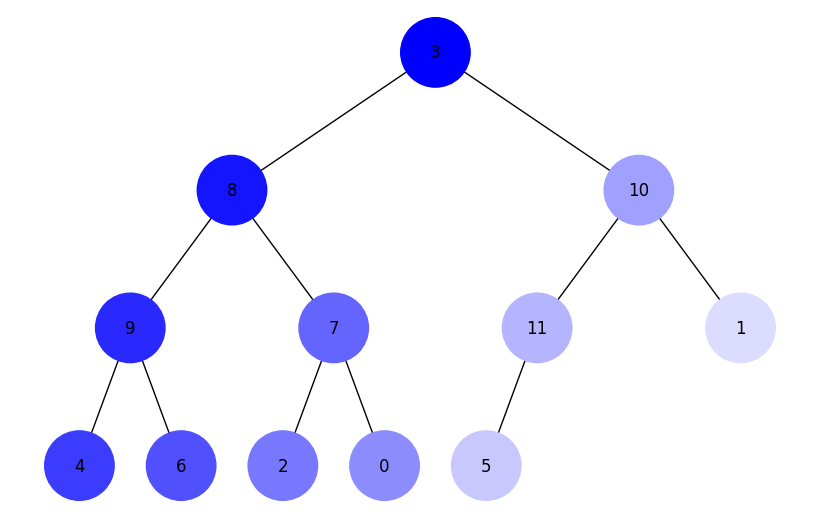

In [293]:
root_deep = make_tree(random.sample(range(12), 12))
deep_walk(root_deep)
draw_tree(root_deep)

### Обхід дерева в ширину

In [297]:
def bread_walk(root):
  r = 0
  g = 0

  q = queue.Queue()
  q.put(root)
  while not q.empty():
    current = q.get()
    current.color = f"#{r:02x}{g:02x}FF"

    if current.left is not None:
      q.put(current.left)

    if current.right is not None:
      q.put(current.right)



    r += 20
    g += 20



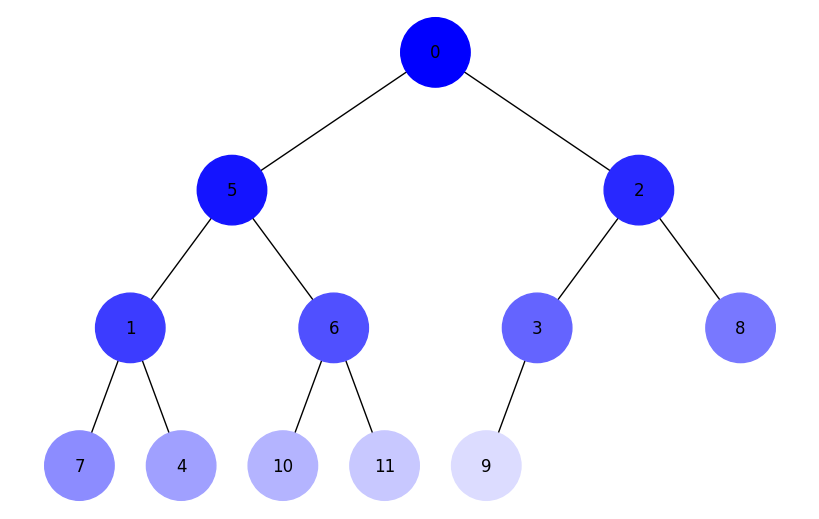

In [298]:
root_bread = make_tree(random.sample(range(12), 12))
bread_walk(root_bread)
draw_tree(root_bread)

## Завдання 6. Жадібні алгоритми та динамічне програмування

## Завдання 7. Використання методу Монте-Карло